### 목표: 여행객들을 대상으로 어떤 관광상품을 개발하는 것이 좋을까?
# 데이터 정보 확인
# 전처리 - 결측치, 오류 확인
# 데이터 탐색(EDA)

# 전처리 과정, 데이터에 대한 관점, 분석 과정, 해석 및 결론


변수
- nat: 국가
- expense: 비용
- bestact: 여행목적

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import koreanize_matplotlib
import seaborn as sns

ftour = pd.read_csv('data/ftour.csv', encoding='cp949')

ftour.head()

print(ftour[:10])




     id  gender age edu job    nat other count  month  info1  ... accom shop1  \
0   584       2   0   1   8     일본           1      3      3  ...     1     7   
1   840       1   3   2   2   싱가포르     1    18     11      3  ...     1     7   
2   524       1   1   3   8    프랑스           1      6      3  ...     3     6   
3   282       1   1   2   8     미국           2      2      2  ...     4     4   
4   562       1   2   3   6     미국     1     1      8      3  ...     2    12   
5   722       2   1   3  12     호주           2      2      4  ...     2     4   
6   128       2   1   2   5     미국           1      4      3  ...     2     4   
7   514       2   1   2   4     홍콩     1     4      3      3  ...     1     2   
8   438       1   2   2   2  말레이시아           1     10      3  ...     1     5   
9  1026       1   1   2   2     미국           1      4      3  ...     1     5   

   shop2  shop3 prd1 prd2 prd3      expense     card         cash  
0     11           5   19        480.975

C:\Users\user\AppData\Local\Temp\ipykernel_16908\2591295476.py:7: DtypeWarning: Columns (2,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  ftour = pd.read_csv('data/ftour.csv', encoding='cp949')


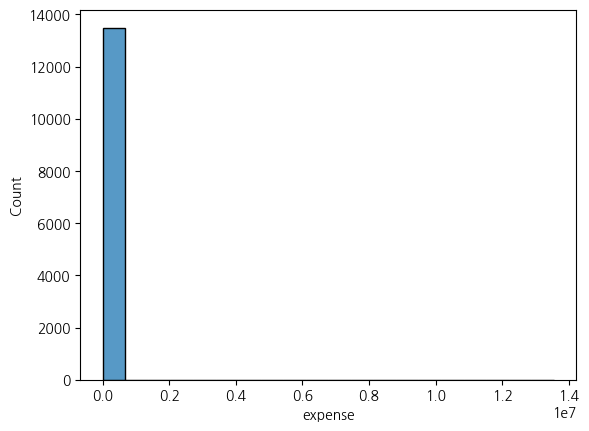

<Axes: xlabel='expense', ylabel='Count'>

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


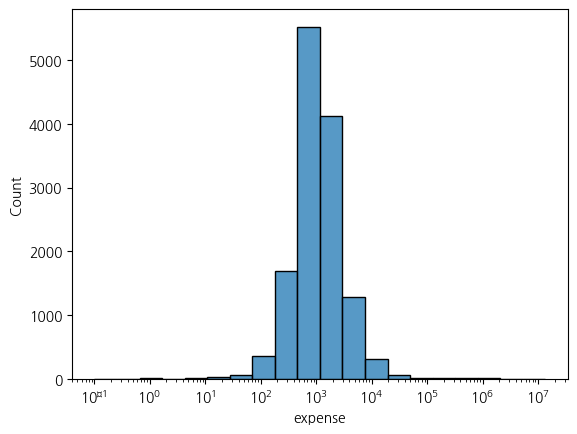

In [3]:
sns.histplot(data=ftour, x="expense", log_scale=False, bins=20)
plt.show()
sns.histplot(data=ftour, x="expense", log_scale=True, bins=20)



In [4]:
print(ftour.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          13501 non-null  int64  
 1   gender      13501 non-null  int64  
 2   age         13501 non-null  object 
 3   edu         13501 non-null  object 
 4   job         13501 non-null  object 
 5   nat         13501 non-null  object 
 6   other       13501 non-null  object 
 7   count       13501 non-null  object 
 8   month       13501 non-null  int64  
 9   info1       13501 non-null  int64  
 10  info2       13501 non-null  object 
 11  info3       13501 non-null  object 
 12  decision    13501 non-null  int64  
 13  object      13501 non-null  int64  
 14  mov1        13501 non-null  object 
 15  mov2        13501 non-null  object 
 16  mov3        13501 non-null  object 
 17  member      13501 non-null  object 
 18  number      13501 non-null  int64  
 19  tourtype    13501 non-nul

In [5]:
ftour.loc[0:10, ftour.columns[0:10]]
ftour.loc[0:10, ftour.columns[10:20]]
ftour.loc[0:10, ftour.columns[20:30]]

,period,overal,sat1,sat2,sat3,sat4,sat5,sat6,sat7,sat8
0,3,5,5,5,5,5,2,5,5,5
1,7,5,5,4,4,3,4,4,4,4
2,21,4,5,5,4,5,3,3,4,4
3,7,5,5,4,5,5,5,5,5,4
4,7,4,5,3,4,5,9,5,4,4
5,37,5,3,5,4,4,4,5,3,3
6,7,5,4,5,4,5,4,5,4,5
7,4,5,5,4,4,3,4,5,5,4
8,5,3,3,3,3,3,3,3,3,3
9,4,4,5,5,4,4,5,4,4,2


In [6]:
ftour.loc[:, ['nat', 'expense']].groupby('nat').describe()



expense                                                      \
        count          mean            std        min         25%   
nat                                                                 
대만      947.0   2976.368916   44982.156946  66.200000  755.168350   
독일      337.0   5496.755050   70768.209462  42.936145  590.500000   
러시아     482.0   2150.726030    3668.988943  10.000000  701.287560   
말레이시아   545.0   3304.984418   29796.945359   2.650456  599.377705   
미국      971.0   3366.381439   45074.250819   1.487770  524.000000   
베트남     523.0   2327.488949   18596.252063  13.200000  584.246404   
싱가포르    483.0  14598.635348  180971.400801   0.683989  883.158901   
영국      393.0   2445.113755   20786.145619   0.927421  562.455000   
인도      324.0   2006.671965    2682.607160   0.527953  548.500000   
인도네시아   440.0   8491.500321   76328.597889   0.101300  649.788413   
일본     1543.0   1007.059995    4638.107045   0.454400  394.785000   
중국     2878.0   4778.364243   58596.508832   0.222296  862.460000   
중동      434.0  39460.417727  658540.621086   1.498444  826.250000   
캐나다     446.0   7669.158039   97560.228447  10.945500  446.160000   
태국      658.0   1491.976598    3400.109412  10.246500  633.882959   
프랑스     346.0   1883.852234    5585.257211   0.787643  613.355730   
필리핀     510.0   1213.309387    3481.282636   1.760000  500.000000   
호주      428.0   1489.987655    1945.715519  37.875000  560.571754   
홍콩      813.0   1516.676494    1760.959587   7.016928  722.778997   

                                              
               50%          75%          max  
nat                                           
대만     1056.240000  1543.730000   1383248.50  
독일      994.365000  1705.350000   1300000.00  
러시아    1200.000000  2376.741877     46781.00  
말레이시아   900.000000  1406.519200    583000.00  
미국      900.000000  1600.000000   1316000.00  
베트남     978.395960  1535.763795    421200.00  
싱가포르   1334.960000  1999.313500   3434400.00  
영국      983.200000  1646.848000    412467.00  
인도     1004.250000  2050.000000     20000.00  
인도네시아   981.490403  1526.250000   1493000.00  
일본      617.984000   859.560000    142000.00  
중국     1575.040000  3029.854250   2691120.00  
중동     1700.000000  3401.382925  13550000.00  
캐나다     848.425400  1553.350000   1933360.00  
태국      920.218750  1380.600000     66681.00  
프랑스    1068.580000  1853.306250    100305.00  
필리핀     779.873048  1229.607425     73350.00  
호주      999.265000  1851.875825     28433.92  
홍콩     1092.250000  1675.700000     31619.35

In [7]:
print(ftour.describe())

                 id        gender         month         info1      decision  \
count  13501.000000  13501.000000  13501.000000  13501.000000  13501.000000   
mean     689.991482      1.521369      6.469299      2.962151      3.329235   
std      621.187845      0.499562      3.451768      1.778965      3.517612   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%      290.000000      1.000000      3.000000      2.000000      1.000000   
50%      588.000000      2.000000      6.000000      3.000000      2.000000   
75%      890.000000      2.000000      9.000000      3.000000      4.000000   
max     7007.000000      2.000000     12.000000      9.000000     72.000000   

             object        number        period        overal          sat1  \
count  13501.000000  13501.000000  13501.000000  13501.000000  13501.000000   
mean       3.170876      3.006666     14.616399      4.406118      4.325457   
std        2.345536      5.888013     34.456984    

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


0        480.975000
1        646.888000
2        560.650000
3        509.225468
4        409.000000
            ...    
13496    711.920000
13497    854.304000
13498    311.465000
13499    649.627000
13500    783.112000
Name: expense, Length: 13501, dtype: float64


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


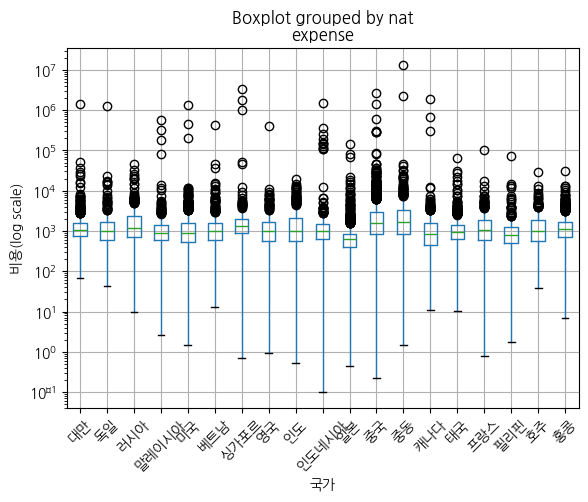

In [8]:
# ftour[['nat', 'expense']].groupby('nat').plot(kind='box')
print(ftour['expense'])
ftour.boxplot(column=['expense'], by='nat')
plt.xticks(rotation=45)
plt.yscale('log')
plt.ylabel('비용(log scale)')
plt.xlabel('국가')
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


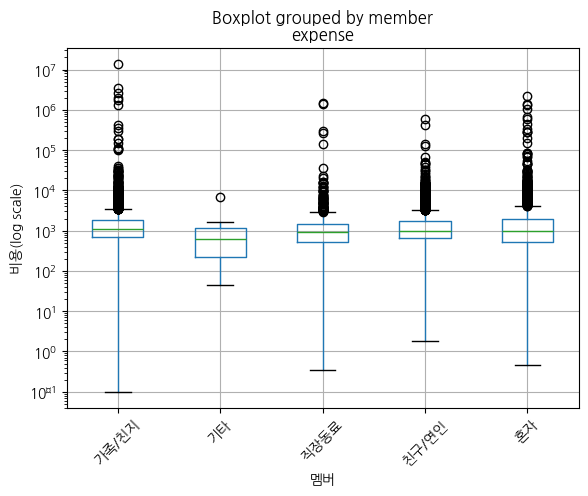

In [9]:
ftour.boxplot(column=['expense'], by='member')
plt.xticks(rotation=45)
plt.yscale('log')
plt.ylabel('비용(log scale)')
plt.xlabel('멤버')
plt.show()

In [16]:
ftour[ftour['id'] == 840]


,id,gender,age,edu,job,nat,other,count,month,info1,...,accom,shop1,shop2,shop3,prd1,prd2,prd3,expense,card,cash
1,840,1,3,2,2,싱가포르,1,18,11,3,...,1,7,,,5,,,646.888000,323.444,323.444000
116,840,2,1,2,8,홍콩,,2,5,3,...,7,4,5,7,4,5,19,771.000000,385.500,385.500000
259,840,2,1,2,2,태국,,2,6,2,...,1,10,,,5,,,875.940500,0.000,875.940541
1392,840,2,2,2,2,호주,,1,4,3,...,2,4,7,10,4,10,14,2510.310000,1445.330,1064.980000
2149,840,1,0,1,8,베트남,,1,1,2,...,5,10,,,4,8,10,1364.555667,0.000,1364.555667
3287,840,2,2,2,14,베트남,2,1,2,5,...,1,1,2,3,8,9,5,1980.000000,0.000,1980.000000
4280,840,1,2,2,2,중국,,7,3,2,...,2,1,5,7,10,12,16,1563.050000,0.000,1563.050000
8265,840,2,1,3,4,인도네시아,,2,7,5,...,1,5,6,7,1,3,5,1650.000000,1150.000,500.000000
9216,840,2,3,2,7,대만,,1,8,1,...,1,1,3,5,4,8,9,2293.500000,0.000,2293.500000
10262,840,2,5,3,8,싱가포르,,2,9,3,...,1,5,7,,4,5,,1179.840000,737.400,442.440000


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


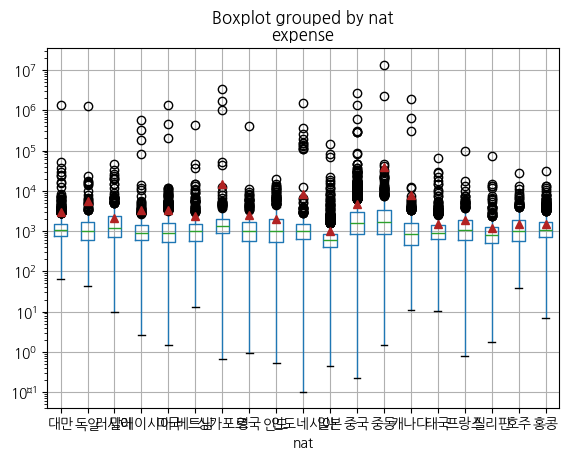

In [10]:
bp = ftour.boxplot(
    column=['expense'],
    by='nat',
    showmeans=True,
    meanprops={
        'markeredgecolor': 'firebrick',
        'markerfacecolor': 'firebrick'
    }
)
plt.yscale('log')
plt.show()


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


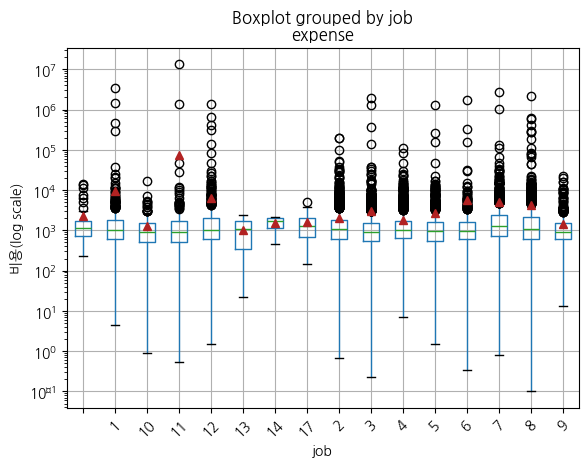

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


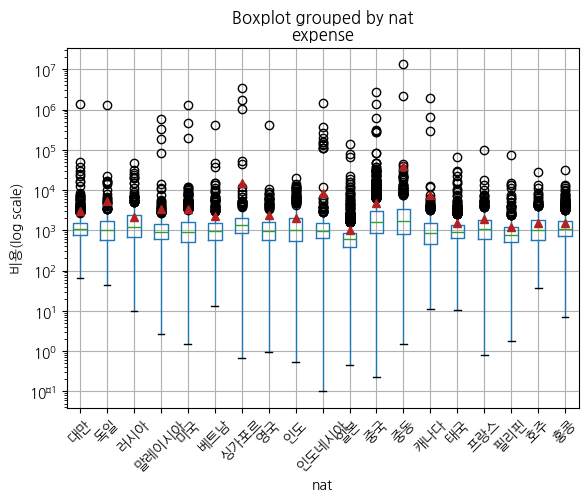

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


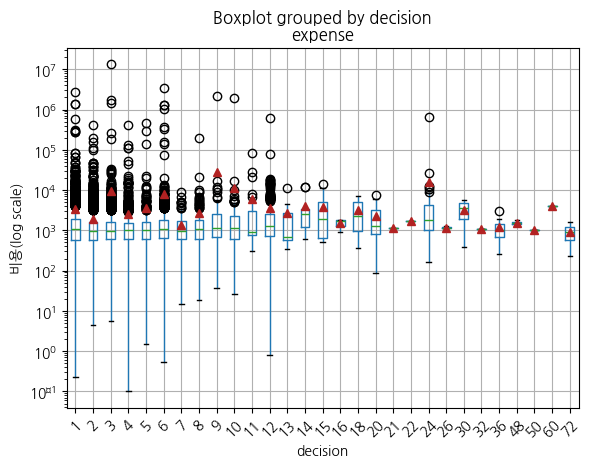

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


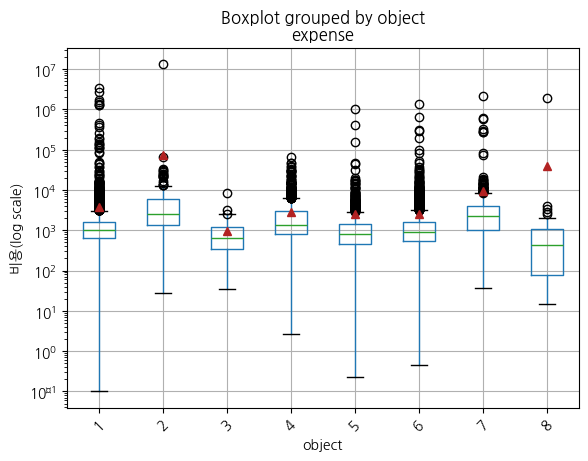

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


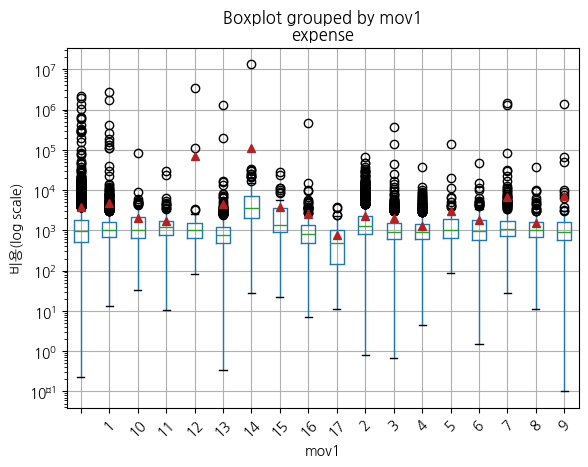

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


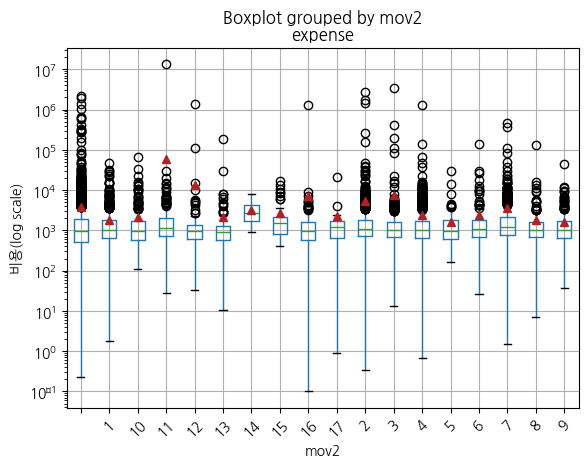

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


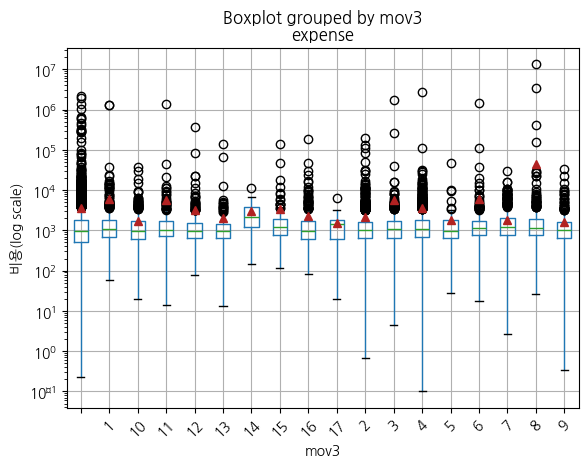

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


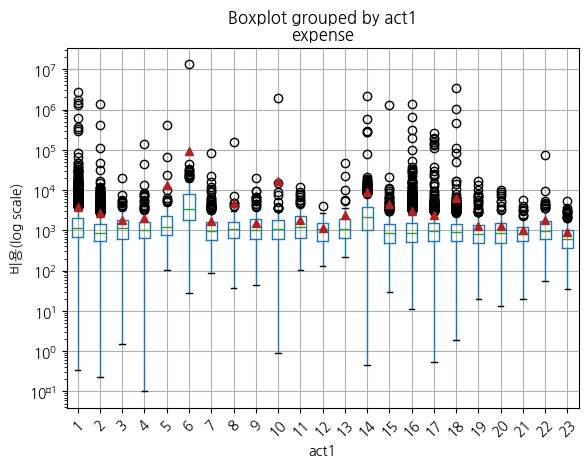

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


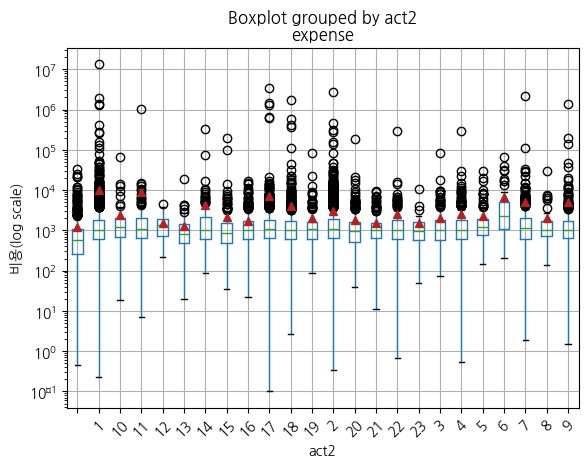

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


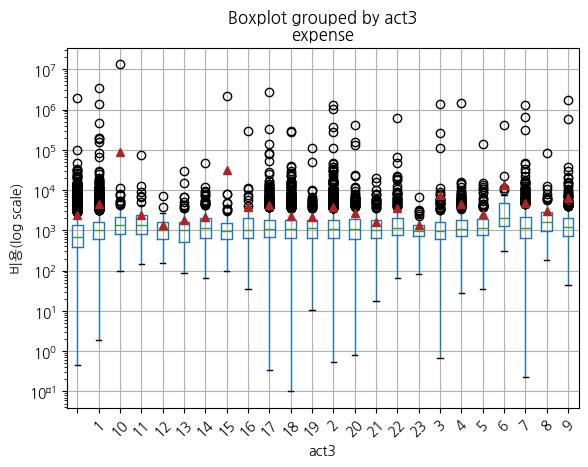

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


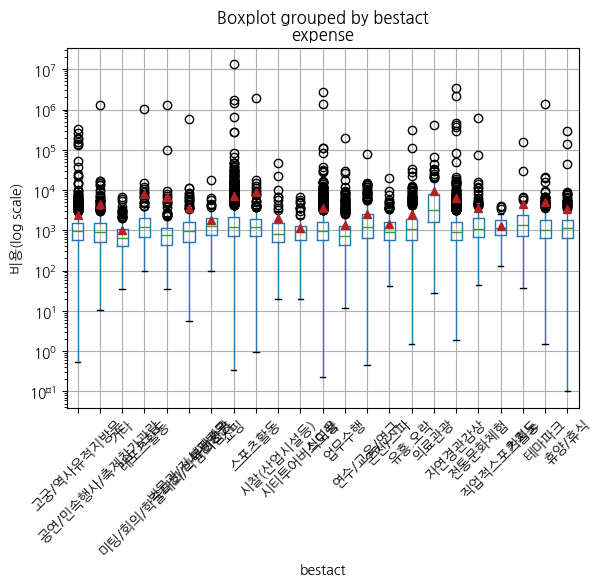

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


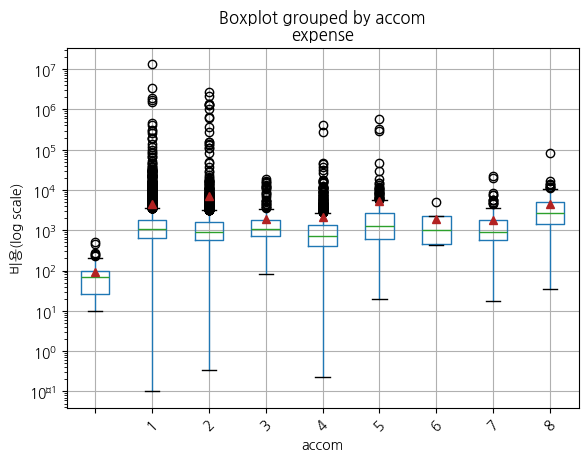

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


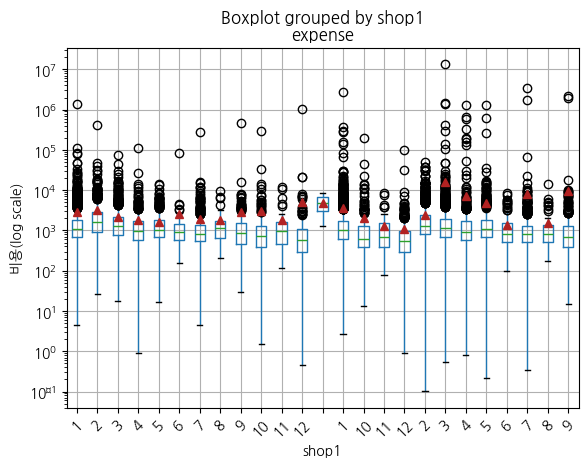

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


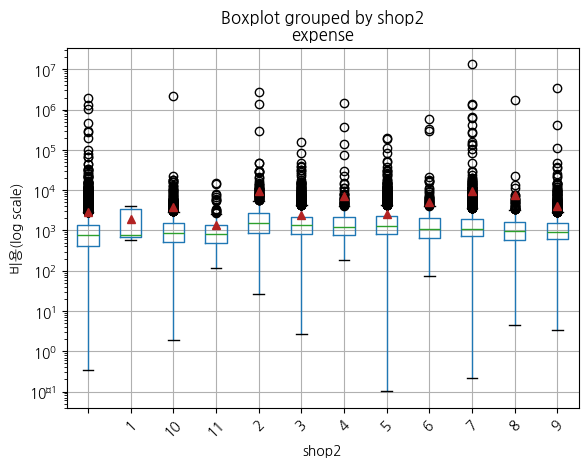

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


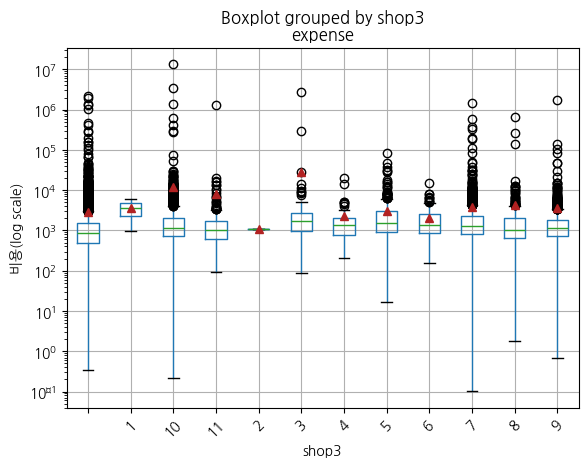

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


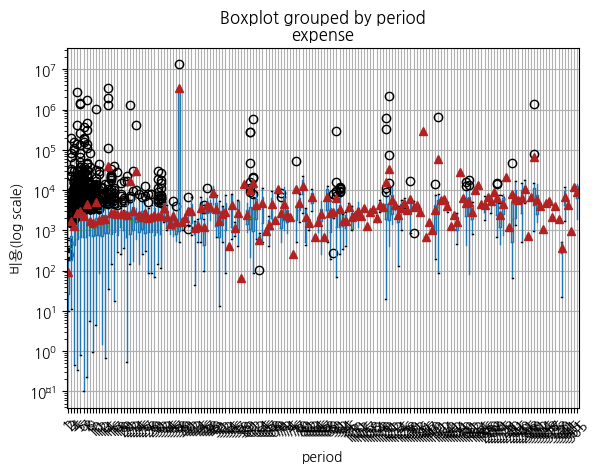

In [11]:
# for col in ftour.columns:
columns = [
    'job', 'nat', 'decision', 'object', 'mov1', 'mov2', 'mov3',
    'act1', 'act2', 'act3', 'bestact', 'accom', 'shop1', 'shop2', 'shop3', 'period'
]

for col in columns:
    bp = ftour.boxplot(
        column=['expense'],
        by=col,
        showmeans=True,
        meanprops={
            'markeredgecolor': 'firebrick',
            'markerfacecolor': 'firebrick'
        }
    )
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.ylabel('비용(log scale)')
    plt.xlabel(col)
    plt.show()




In [ ]:
# 상위 5% 자르기

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import koreanize_matplotlib
import seaborn as sns

ftour = pd.read_csv('data/ftour.csv', encoding='cp949')

ftour.head()

ftour_s = ftour.sort_values(by='expense' ,ascending=False)
ftour_s.reset_index(drop=True, inplace=True)


ftour_s = ftour_s.loc[:ftour_s.shape[0]*0.05, ['expense', 'nat', 'bestact']]
print(ftour_s.head())
ftour_s.shape





      expense   nat bestact
0  13550000.0    중동      쇼핑
1   3434400.0  싱가포르  자연경관감상
2   2691120.0    중국     식도락
3   2200000.0    중동  자연경관감상
4   1933360.0   캐나다   스포츠활동


C:\Users\user\AppData\Local\Temp\ipykernel_32160\1148061312.py:9: DtypeWarning: Columns (2,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  ftour = pd.read_csv('data/ftour.csv', encoding='cp949')


(676, 3)

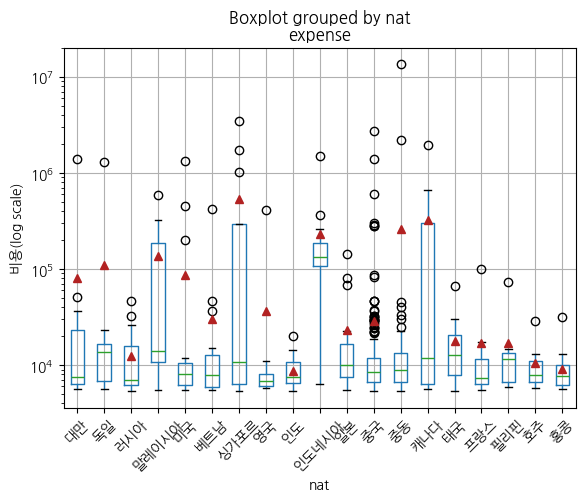

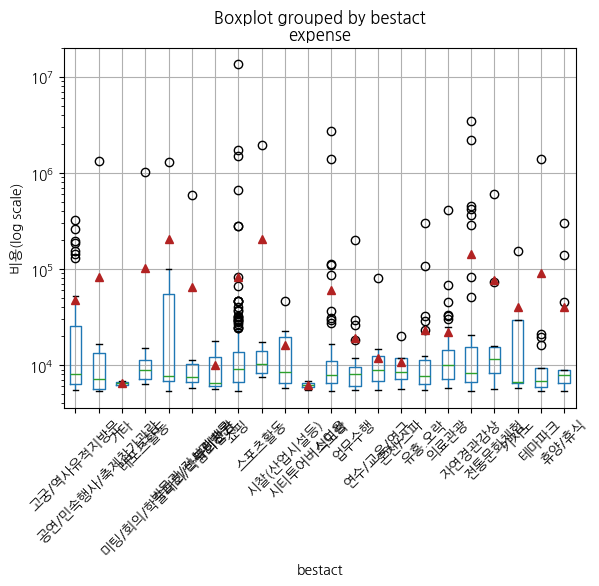

In [30]:
for col in ['nat', 'bestact']:
    bp = ftour_s.boxplot(
        column=['expense'],
        by=col,
        showmeans=True,
        meanprops={
            'markeredgecolor': 'firebrick',
            'markerfacecolor': 'firebrick'
        }
    )
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.ylabel('비용(log scale)')
    plt.xlabel(col)
    plt.show()

# 지출 비용별 등급 생성

### 목표: 여행객들을 대상으로 어떤 관광상품을 개발하는 것이 좋을까?
- 데이터 정보 확인
- 전처리 - 결측치, 오류 확인
- 데이터 탐색(EDA)
- 전처리 과정, 데이터에 대한 관점, 분석 과정, 해석 및 결론


변수
- nat: 국가
- expense: 비용
- bestact: 여행목적

In [218]:
# 전처리
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import koreanize_matplotlib
import seaborn as sns

ftour = pd.read_csv('data/ftour.csv', encoding='cp949')


C:\Users\user\AppData\Local\Temp\ipykernel_32160\1928976069.py:8: DtypeWarning: Columns (2,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  ftour = pd.read_csv('data/ftour.csv', encoding='cp949')


In [219]:
print(ftour.groupby("nat")['id'].count())

nat
대만        947
독일        337
러시아       482
말레이시아     545
미국        971
베트남       523
싱가포르      483
영국        393
인도        324
인도네시아     440
일본       1543
중국       2878
중동        434
캐나다       446
태국        658
프랑스       346
필리핀       510
호주        428
홍콩        813
Name: id, dtype: int64


In [220]:

# print(ftour.groupby("bestact")['id'].count())
print(ftour.value_counts("bestact"))

bestact
쇼핑                  3531
식도락                 2211
자연경관감상              1435
고궁/역사유적지방문          1350
업무수행                 932
유흥.오락                545
공연/민속행사/축제참가관람       418
테마파크                 403
전통문화체험               352
박물관/전시관방문            274
스포츠활동                268
연수/교육/연구             264
휴양/휴식                263
미팅/회의/학술대회/박람회참가     248
레포츠활동                173
온천/스파                169
의료관광                 134
기타                   127
시티투어버스이용             119
시찰(산업시설등)             92
뷰티관광                  84
카지노                   67
직업적스포츠홀동              42
Name: count, dtype: int64


In [221]:
# act_type
# A - 쇼핑
# B - 식도락
# C - 자연경관감상
# D - 고궁/역사유적지방문, 박물관/전시관방문, 전통문화체험
# E - 업무수행, 시찰(산업시설등), 미팅/회의/학술대회/박람회참가, 연수/교육/연구, 직업적스포츠홀동
# F - 유흥.오락, 카지노, 테마파크, 공연/민속행사/축제참가관람
# G - 스포츠활동, 레포츠활동
# H - 휴양/휴식, 온천/스파
# I - 의료관광
# J - 뷰티관광
# K - 기타, 시티투어버스이용

ftour["act_type"] = None
ftour.loc[ftour["bestact"] == "쇼핑", "act_type"] = "A"
ftour.loc[ftour["bestact"] == "식도락", "act_type"] = "B"
ftour.loc[ftour["bestact"] == "자연경관감상", "act_type"] = "C"
ftour.loc[ftour["bestact"].isin(["고궁/역사유적지방문", "박물관/전시관방문", "전통문화체험"]), "act_type"] = "D"
ftour.loc[ftour["bestact"].isin(["업무수행", "시찰(산업시설등)", "미팅/회의/학술대회/박람회참가", "연수/교육/연구", "직업적스포츠홀동"]), "act_type"] = "E"
ftour.loc[ftour["bestact"].isin(["유흥.오락", "카지노", "테마파크", "공연/민속행사/축제참가관람"]), "act_type"] = "F"
ftour.loc[ftour["bestact"].isin(["스포츠활동", "레포츠활동"]), "act_type"] = "G"
ftour.loc[ftour["bestact"].isin(["휴양/휴식", "온천/스파"]), "act_type"] = "H"
ftour.loc[ftour["bestact"] == "의료관광", "act_type"] = "I"
ftour.loc[ftour["bestact"] == "뷰티관광", "act_type"] = "J"
ftour.loc[ftour["bestact"].isin(["기타", "시티투어버스이용"]), "act_type"] = "K"

print(ftour.groupby("act_type").count()["id"])


act_type
A    3531
B    2211
C    1435
D    1976
E    1578
F    1433
G     441
H     432
I     134
J      84
K     246
Name: id, dtype: int64


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   expense   13501 non-null  float64
 1   nat       13501 non-null  object 
 2   bestact   13501 non-null  object 
 3   act_type  13501 non-null  object 
dtypes: float64(1), object(3)
memory usage: 422.0+ KB
None
            expense
count  1.350100e+04
mean   4.767706e+03
std    1.297740e+05
min    1.013000e-01
25%    6.018940e+02
50%    1.017800e+03
75%    1.792000e+03
max    1.355000e+07


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


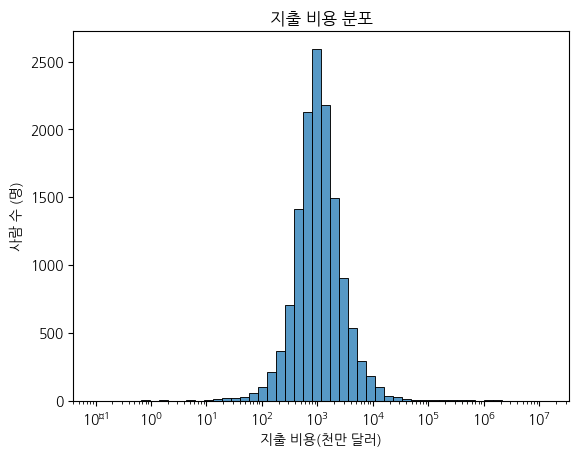

In [222]:
ftour.head()
sns.histplot(data=ftour, x="expense", log_scale=True, bins=50)
plt.title("지출 비용 분포")
plt.xlabel("지출 비용(천만 달러)")
plt.ylabel("사람 수 (명)")

ftour_grade = ftour[['expense', 'nat', 'bestact', 'act_type']]
print(ftour_grade.info())
print(ftour_grade.describe())


In [223]:

ftour_grade["grade"] = None
ftour_grade.loc[ftour_grade["expense"] <= 100, "grade"] = "B"
ftour_grade.loc[ftour_grade["expense"] > 100, "grade"] = "A"
ftour_grade.loc[ftour_grade["expense"] > 1000, "grade"] = "S"
ftour_grade.loc[ftour_grade["expense"] > 10000, "grade"] = "SS"
ftour_grade.loc[ftour_grade["expense"] > 100000, "grade"] = "SSS"

ftour_grade

C:\Users\user\AppData\Local\Temp\ipykernel_32160\2118170383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftour_grade["grade"] = None


,expense,nat,bestact,act_type,grade
0,480.975000,일본,공연/민속행사/축제참가관람,F,A
1,646.888000,싱가포르,자연경관감상,C,A
2,560.650000,프랑스,전통문화체험,D,A
3,509.225468,미국,쇼핑,A,A
4,409.000000,미국,고궁/역사유적지방문,D,A
...,...,...,...,...,...
13496,711.920000,일본,자연경관감상,C,A
13497,854.304000,일본,자연경관감상,C,A
13498,311.465000,일본,자연경관감상,C,A
13499,649.627000,일본,식도락,B,A


grade
B       211
A      6441
S      6587
SS      224
SSS      38
Name: expense, dtype: int64


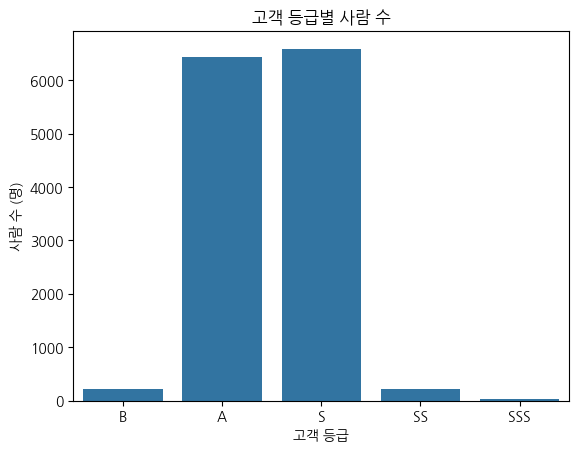

grade
B      1.204111e+04
A      3.883724e+06
S      1.535878e+07
SS     4.383965e+06
SSS    4.073030e+07
Name: expense, dtype: float64


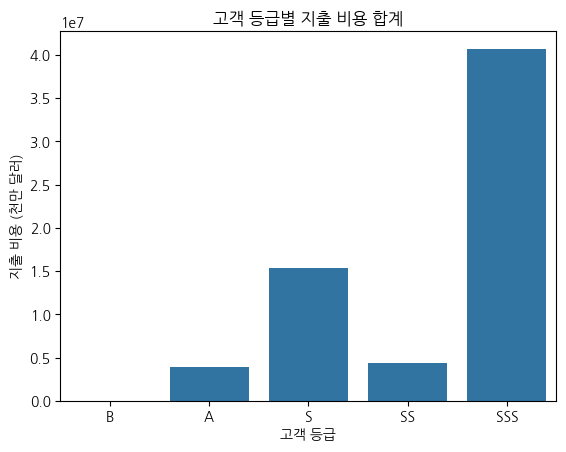

In [224]:
ftour_grade.describe(include="object")

# 고객 등급별 사람 수
print(ftour_grade.groupby("grade").count()["expense"].loc[["B", "A", "S", "SS", "SSS"]])
sns.barplot(ftour_grade.groupby("grade").count()["expense"].loc[["B", "A", "S", "SS", "SSS"]])
plt.title("고객 등급별 사람 수")
plt.ylabel("사람 수 (명)")
plt.xlabel("고객 등급")
plt.show()

# 고객 등급별 지출 비용 합계
print(ftour_grade.groupby("grade").sum()["expense"].loc[["B", "A", "S", "SS", "SSS"]])
sns.barplot(ftour_grade.groupby("grade").sum()["expense"].loc[["B", "A", "S", "SS", "SSS"]])
plt.title("고객 등급별 지출 비용 합계")
plt.ylabel("지출 비용 (천만 달러)")
plt.xlabel("고객 등급")
plt.show()


In [225]:
ftour_grade.loc[ftour_grade["grade"] == "SSS", "expense"].mean() / ftour_grade.loc[ftour_grade["grade"] != "SSS", "expense"].mean()

np.float64(610.4579190898228)

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


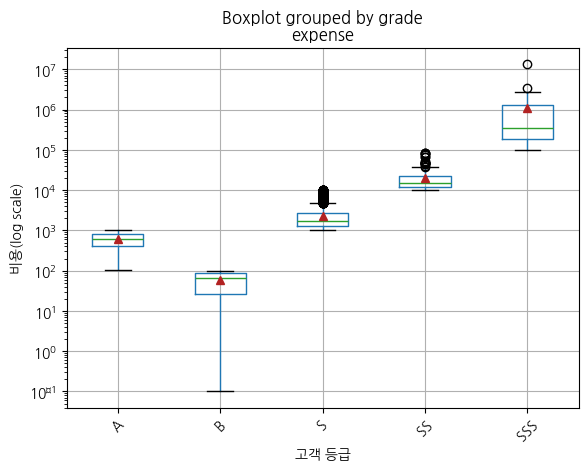

In [229]:
bp = ftour_grade.boxplot(
    column=['expense'],
    by="grade",
    showmeans=True,
    meanprops={
        'markeredgecolor': 'firebrick',
        'markerfacecolor': 'firebrick'
    }
)
plt.xticks(rotation=45)
plt.yscale('log')
plt.ylabel('비용(log scale)')
plt.xlabel("고객 등급")
plt.show()

In [168]:
ftour_grade_sss = ftour_grade[ftour_grade["grade"] == "SSS"]
ftour_grade_sss.describe(include="object")
print(ftour_grade_sss.shape)
print(ftour_grade_sss.groupby("act_type")["expense"].sum())

(38, 5)
act_type
A    18005781.00
B     4297448.50
C     7162395.00
D     2582840.00
E     1600305.00
F     3266343.00
G     2962500.00
H      440216.64
I      412467.00
Name: expense, dtype: float64


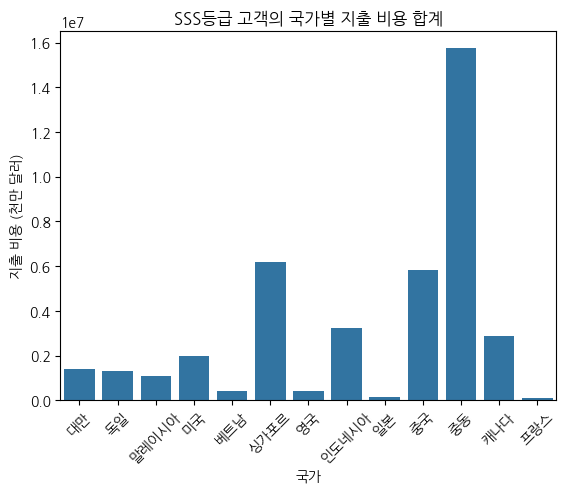

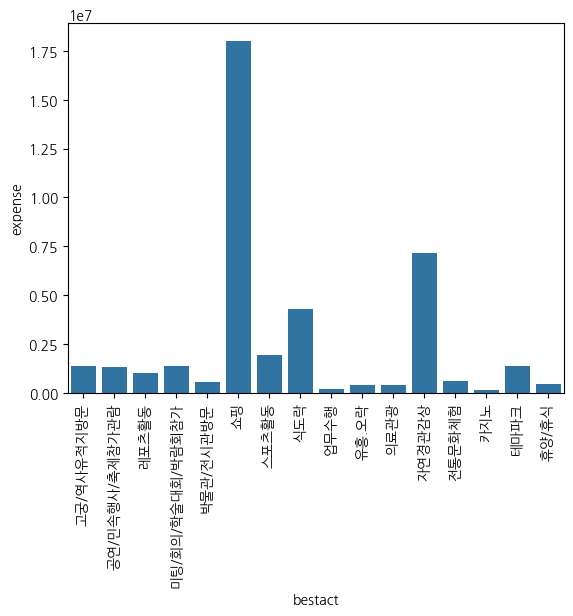

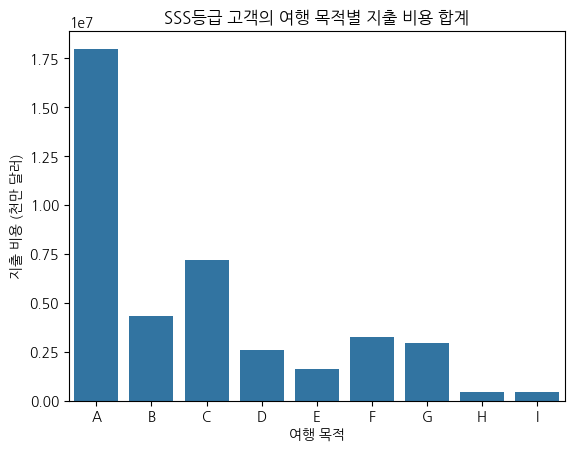

In [208]:

sns.barplot(ftour_grade_sss.groupby("nat")["expense"].sum())
plt.xticks(rotation=45)
plt.title("SSS등급 고객의 국가별 지출 비용 합계")
plt.ylabel("지출 비용 (천만 달러)")
plt.xlabel("국가")
plt.show()

sns.barplot(ftour_grade_sss.groupby("bestact")["expense"].sum())
plt.xticks(rotation=90)
plt.show()

sns.barplot(ftour_grade_sss.groupby("act_type")["expense"].sum())
plt.title("SSS등급 고객의 여행 목적별 지출 비용 합계")
plt.ylabel("지출 비용 (천만 달러)")
plt.xlabel("여행 목적")
plt.show()

In [157]:
ftour_grade_sss.sort_values("expense")


,expense,nat,bestact,act_type,grade
446,100305.00,프랑스,미팅/회의/학술대회/박람회참가,E,SSS
3211,108192.00,인도네시아,유흥.오락,F,SSS
9930,109200.00,인도네시아,식도락,B,SSS
9491,113880.00,인도네시아,식도락,B,SSS
6047,128730.00,인도네시아,고궁/역사유적지방문,D,SSS
3078,140620.20,인도네시아,휴양/휴식,H,SSS
4372,142000.00,일본,고궁/역사유적지방문,D,SSS
7534,153450.00,인도네시아,카지노,F,SSS
6046,154000.00,인도네시아,고궁/역사유적지방문,D,SSS
5739,184880.00,말레이시아,고궁/역사유적지방문,D,SSS
